In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
belize_df = pd.read_csv("belize_airbnb_listings.csv")
belize_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


### 1.	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 

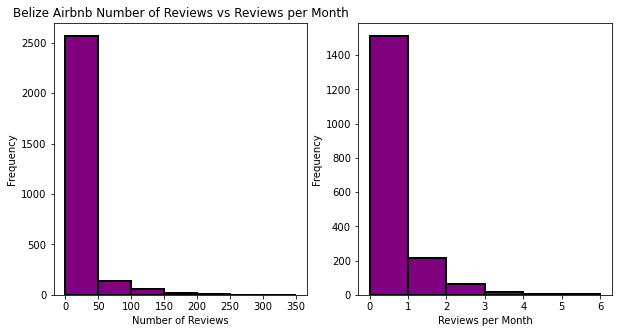

In [271]:
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
plt.hist(belize_df['number_of_reviews'],bins=range(0,400,50), color='purple',edgecolor='black',lw=2)
plt.title("Belize Airbnb Number of Reviews vs Reviews per Month")
plt.xlabel("Number of Reviews",fontsize=10)
plt.ylabel("Frequency",fontsize=10)

bins=[0,1,2,3,4,5,6]
plt.subplot(1,2,2)
plt.hist(belize_df['reviews_per_month'],bins=bins,color='purple',edgecolor='black',lw=2)
#plt.title("histogram for reviews_per_month")
plt.xlabel("Reviews per Month",fontsize=10)
plt.ylabel("Frequency",fontsize=10);


### a. How do you choose your bin size?

For choosing the bin size for number_of_reviews I used a Range function having arguments as (start,stop,step).For selecting the
start and the stop range I looked at the max and the min values for the specified column.

max = belize_df['number_of_reviews'].max()

min = belize_df['number_of_reviews'].min()



For choosing the bin size for Reviews per month I looked at the max and the min values for the column and then
passed the required values as a list to further group my data into those values.

max = belize_df['reviews_per_month'].max()

min = belize_df['reviews_per_month'].min()

### 2. Create a box and whisker plot for availability_365. What does this show you?

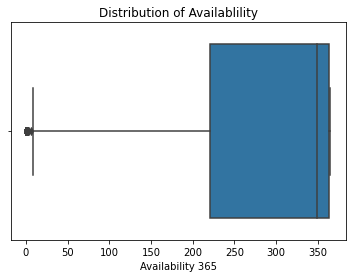

In [5]:
sns.boxplot(x="availability_365",data=belize_df)
plt.title("Distribution of Availablility")
plt.xlabel("Availability 365");

This plot shows that most of the rentals are available at least 220 days.Very few have little or no availability.

The black line in the box is the median which is around 349 and 50% of the data will be above this value and 50% would be lower than this value. The box plot gives us an idea about :

The min value is 0

Q1(first quartile) is 221

median is at 349

The Q3 value is at 364

max value is at 365

The data is left skewed


In [139]:
from scipy.stats import iqr 


In [140]:
interquartile = iqr(belize_df['availability_365'])
interquartile

143.0

In [158]:
lower_threshold = np.quantile(belize_df['availability_365'],0.25) - 1.5*interquartile
lower_threshold

upper_threshold= np.quantile(belize_df['availability_365'],0.75) + 1.5*interquartile
upper_threshold 
print(lower_threshold,upper_threshold)

6.5 578.5


In [164]:
filt= (belize_df['availability_365'] < lower_threshold) | (belize_df['availability_365'] >= upper_threshold)
belize_df[filt].head(5)                                                              

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,120116,Valarosa,604999,Bobbi,Belize,Belize Islands,17.73644,-88.02858,Entire home/apt,171,2,49,3/23/2020,0.80,22,0
24,419134,AQUA Cabana + FREE Wine (1 bottle)*,2084006,Lower Dover,Cayo,Cayo,17.20777,-88.94610,Private room,119,1,21,3/4/2020,0.25,4,0
41,1135078,"Bay Breezes apt #4, Caye Caulker",911311,Hilda,Belize,Belize Islands,17.73951,-88.03293,Entire home/apt,89,1,138,3/13/2020,1.55,10,1
43,1177282,Belize Waterfront - Orchid Bay Casita 9A,6441582,Jeff And Debi,Corozal,Corozal,18.32853,-88.32882,Entire home/apt,252,2,33,12/8/2020,0.36,1,0
50,1432085,Hummingbird Pool House 2 bedroom cabin,604999,Bobbi,Belize,Belize Islands,17.73675,-88.02850,Entire home/apt,226,1,64,1/24/2021,0.80,22,1


### 3. What is the probability that the price for an Airbnb is under $50.

In [57]:
price_under50 = belize_df[belize_df['price'] <50]['price'].count()
price_under50

total_price = belize_df['price'].count()
total_price

prob_price = price_under50 /total_price
prob_price

0.017525035765379112

###  What do you notice about these records? Hint: look at the other columns

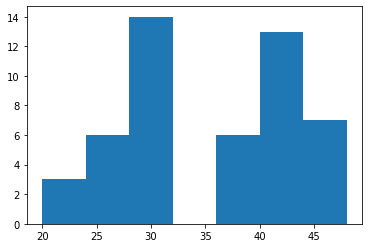

In [71]:
filt = belize_df['price'] <50
df_50=belize_df.loc[filt]
df_50

plt.hist(df_50['price'],bins='auto');
#From the graph we can say that there are no  airbnb's available in the price range of 32-36.Also, the price for
#shared room is more than the private room or the entire house at some instances which may be an outlier in this case.



### b. What distribution does this data most closely fit?

In [ ]:
This distribution fits closely to Normal distribution if we look at the price column in our dataset.

### 4. Calculate the sample variance and standard deviation for all the numerical columns in the same output. 

In [72]:
belize_df.round(5)
belize_df[['price' , 'minimum_nights' , 'number_of_reviews' , 'reviews_per_month' , 'calculated_host_listings_count' ,'availability_365']].var(ddof=1)


price                             317109.568066
minimum_nights                        32.147122
number_of_reviews                    919.773508
reviews_per_month                      0.438448
calculated_host_listings_count      2674.046405
availability_365                   14548.613157
dtype: float64

In [195]:
belize_df[['price' , 'minimum_nights' , 'number_of_reviews' , 'reviews_per_month' , 'calculated_host_listings_count' ,'availability_365']].std(ddof=1)

price                             563.124825
minimum_nights                      5.669843
number_of_reviews                  30.327768
reviews_per_month                   0.662154
calculated_host_listings_count     51.711183
availability_365                  120.617632
dtype: float64

 ### a.Why sample variance and not population variance?

For example I want to collect the data for some of the equity funds – these funds will be my sample. It is not necessary (and probably not possible) to collect the data for all the funds in the world (the population). I must only make sure that my sample is large enough. While having the data for 5 funds would probably be insufficient to estimate standard deviation for the whole population, 100 funds data can be enough and still very realistic to get.
This is the reason why Sample variance is preferred over population.

### b.What is your takeaway for each metric?

In [ ]:
ordinal for long and lat 
price would be interval / ratio 
minimum_nights would be interval /ratio 
As per my understanding 

### c. What are the scales of measurement for each of these values? 

Out of the 4 scales of measurement namely nominal,ordinal,interval and ratio.

The scales of measuements relevant for standard deviation and variance are Interval and ratio.

### 5.What percent of Airbnb listings in Belize are available 360 days a year or more?

In [86]:
days_360or_more  = belize_df[belize_df['availability_365'] >=360]['availability_365'].count()
total_availability = belize_df['availability_365'].count()

percent_airbnb_listings = days_360or_more / total_availability * 100
percent_airbnb_listings



39.52074391988555

### Creating a Histogram  for visualizing the data

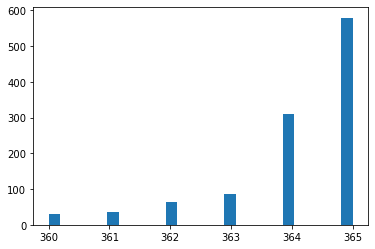

In [81]:
filt = belize_df['availability_365'] >=360
df_360=belize_df.loc[filt]
df_360

plt.hist(df_360['availability_365'],bins='auto');

### a.360 days or less?

In [87]:
days_360or_less = belize_df[belize_df['availability_365'] <=360]['availability_365'].count()
total_availability = belize_df['availability_365'].count()

percent_airbnb_listings = days_360or_less / total_availability * 100
percent_airbnb_listings

61.55221745350501

### Creating a Histogram for visualizing the data

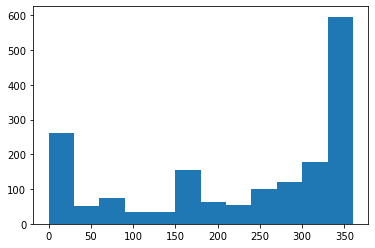

In [88]:
filt = belize_df['availability_365'] <=360
df_360=belize_df.loc[filt]
df_360

plt.hist(df_360['availability_365'],bins='auto');

### b.What distribution does this data most closely fit?

As per my understanding this data most closely fits the Poisson Distribution .
As in poisson distribution we take into account the number of times an event is likely to occur,within a certain timeframe.
So, in our case we are considering availability of airbnb's over a period of one year.

### 6.What minimum night count are 75% of Airnbnb listing in Belize greater than?

In [91]:
from scipy.stats import norm
import numpy as np
avg_minimum_nights = belize_df['minimum_nights'].mean()
dev_min_nights = belize_df['minimum_nights'].std()
print(avg_minimum_nights,dev_min_nights)
norm.ppf((1-0.75),2.26,5.66)
#belize_df['minimum_nights'].median()

# There might be more nights which are never booked, while performing these calculations like mean 
# making these values to a negative number

2.263948497854077 5.6698432082950365


-1.5576119861098228

In [28]:
belize_df['minimum_nights'].describe().round(2)

count    2796.00
mean        2.26
std         5.67
min         1.00
25%         1.00
50%         2.00
75%         3.00
max       180.00
Name: minimum_nights, dtype: float64

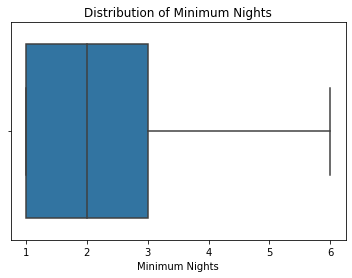

In [54]:
sns.boxplot(x="minimum_nights",data=belize_df,showfliers=False)
plt.title("Distribution of Minimum Nights")
plt.xlabel("Minimum Nights");